In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Method 1

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import os
os.chdir('/content/drive/My Drive/KE5205 text mining/Workshops/Day 2/Mini-Project')

## Data prep

In [4]:
# label as a control
import pandas as pd
osha=pd.read_table('osha.txt',header=None,names = ["Class", "Text"])
osha.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,Class,Text
201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...
202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...
200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...
200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...
201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...


# Preprocess


In [0]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


In [0]:
def convert_lower_case(data):
    return np.char.lower(data)

In [0]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [0]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

In [0]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [0]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [0]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

### Using preprocessing
* https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer= PorterStemmer()
input_str="There are several types of stemming algorithms."
input_str=word_tokenize(input_str)
for word in input_str:
    print(stemmer.stem(word))

there
are
sever
type
of
stem
algorithm
.


In [0]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def lemmatize(data):
  lemmatizer=WordNetLemmatizer()
  input_str=word_tokenize(data)
  new_text = ""
  for word in input_str:
      new_text = new_text + " " + lemmatizer.lemmatize(word)
  return new_text

In [14]:
input_str="been had done languages cities mice"
lemmatize(input_str)

' been had done language city mouse'

In [15]:
stemming(input_str)

' been had done languag citi mice'

In [0]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data

## data preproc

In [0]:
import nltk
from nltk.corpus import stopwords
mystopwords=stopwords.words() + ['the','is','it','may']
WNlemma = nltk.WordNetLemmatizer()


def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens=[WNlemma.lemmatize(t) for t in tokens]
    tokens=[word for word in tokens if word not in mystopwords]
    text_after_process=" ".join(tokens)
    return(text_after_process)

#Apply the function on each document
# Apply preprocessing to every document in the training set.
text = osha['Class']
toks = text.apply(pre_process)

In [18]:
toks

201079928        Employee Is Burned By Forklift Radiator Fluid
202561825    Employee Falls From Flatbed Trailer And Later ...
200361855    Two Workers Are Struck By Motor Vehicle And On...
200361863       Employee Is Struck By Bales Of Wire And Killed
201079324    Employee Is Splashed With Hot Water And Is Burned
202658258             Employee Suffers Burns While Moving Soup
202685947                     Employee Injures Self With Knife
202673471    Foreman Is Fatally Crushed When Forklift Tips ...
202369575    Employee Fractures Abdomen When Run Over By Tu...
202509832    Employee Suffers Abdominal Fracture In Fall Fr...
201129681     Carpenter Injured In Abdomen When Saw Kicks Back
202081899    Employee Abdomen And Head Injury In Slip And F...
202082020    Employee Sustains Ruptured Spleen After Board ...
201562840    Employee 'S Body Is Caught In Asphalt Machine ...
202674610    Logger Is Injured When Butt Of Tree Kicks Out ...
201703584    Worker Is Injured When Struck By Board And

In [19]:
mystopwords

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [20]:
## Create TDM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Create tfidf matrix
vectorizer = TfidfVectorizer(max_df=0.7, max_features=2500,
                             min_df=3, stop_words=mystopwords,
                             use_idf=True)
X = vectorizer.fit_transform(toks)
X.shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ali', 'ampak', 'baiknya', 'baje', 'berkali', 'bi', 'bil', 'bile', 'bili', 'bilo', 'biti', 'blizu', 'bo', 'bodi', 'bodimo', 'bodisi', 'bodita', 'bodite', 'bodiva', 'bodo', 'bojda', 'bojo', 'bom', 'bomo', 'bosta', 'boste', 'bova', 'boš', 'brez', 'bržkone', 'bržčas', 'celo', 'deset', 'deseta', 'desete', 'desetega', 'desetem', 'desetemu', 'deseter', 'desetera', 'desetere', 'deseterega', 'deseterem', 'deseteremu', 'deseteri', 'deseterih', 'deseterim', 'deseterima', 'deseterimi', 'desetero', 'deseti', 'desetih', 'desetim', 'desetima', 'desetimi', 'deseto', 'devet', 'deveta', 'devetdeset', 'devetdeseta', 'devetdesete', 'devetdesetega', 'devetdesetem', 'devetdesetemu', 'devetdeseti', 'devetdesetih', 'devetdesetim', 'devetdesetima', 'devetdesetimi', 'devetdeseto', 'devete', 'devetega', 'devetem', 'de

(10000, 1493)

Use SVD to reduce dimension

In [21]:
svd = TruncatedSVD(800)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)


#set to False to perform inplace row normalization

# Check how much "variance is explained" (information is kept)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))


Explained variance of the SVD step: 89%


Use K means to cluster

In [22]:
from sklearn.cluster import KMeans
n_clusters=2000
km3 = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, n_init=1)
km3.fit(X_lsa)

#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
#n_init : int, default: 10. Number of time the k-means algorithm will be run with different centroid seeds.
#Maximum number of iterations of the k-means algorithm for a single run.

from sklearn import metrics


# Evaluate the 3 clusters 
# Coefficient: more similar within clusters, more distant between clusters
# The higher the better (-1 to 1)

print("Coefficient for {} clusters: %0.3f".format(n_clusters)
      % metrics.silhouette_score(X_lsa, km3.labels_))

Coefficient for 2000 clusters: 0.182


## Check cluster results

In [23]:
# what's inside these clusters?
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km3, 30)

Cluster 0: pelvis accident fractured crane suffers packer attacked inflating 25 mowing
Cluster 1: skylight roof worker fall killed falling injured covered hvac roofer
Cluster 2: ladder fall injured sewer service pool food bearing bladder canning
Cluster 3: electric shock injured possible suffers burns later receiving underground fixing
Cluster 4: casting head crushed machine impaled foot killed injured pinches footing
Cluster 5: leg fractures truck falls driver hole debris lift container electrician
Cluster 6: press amputates finger metal machine caught cycles fingertips printing casting
Cluster 7: tar coal burned employees inhaling ignited vapors hand kettle carrying
Cluster 8: run truck killed struck injured diesel gets pole later pulling
Cluster 9: killed lunch killing mixing pronounced vacuum collaspes break chamber left
Cluster 10: drill press finger amputated injured ring fingers operator amputates collar
Cluster 11: burn suffers injuries fingers explosion sealer glue ladle spill

# Method 2
* https://www.kaggle.com/thebrownviking20/k-means-clustering-of-1-million-headlines

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [25]:
data=pd.read_table('osha.txt',header=None,names = ["text", "description"])
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,text,description
201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...
202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...
200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...
200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...
201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 201079928 to 200551752
Data columns (total 2 columns):
text           10000 non-null object
description    10000 non-null object
dtypes: object(2)
memory usage: 234.4+ KB


Removing duplicates

In [27]:
# delete duplicates
data[data['text'].duplicated(keep=False)].sort_values('text').head(8)


,text,description
120280466,Burn,An employee was setting a new 480-volt meter ...
170855332,Burn,On April 16 2003 an electrician was working...
202627758,Burn,An employee was working on energized electric...
202554218,Burn,At 1:40 p.m. on September 23 2011 Employee ...
200203701,Burn,On August 9 2011 workers for a demolition c...
201155223,Burn,An electrician was installing a power-monitor...
170393318,Burn,Between 2:00 PM on April 20 and 6:00 AM April...
689141,Burn,A lead worker and four other employees were a...


## Data preparation

In [0]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['text'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [0]:
data = data.drop_duplicates('text')


In [30]:
data.head()

,text,description
201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...
202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...
200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...
200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...
201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...


## TF-IDR

In [0]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['text'].values
vectorizer = TfidfVectorizer(stop_words = stop_words,use_idf=True)
X = vectorizer.fit_transform(desc)

In [32]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[100:110])

3587
['aligning', 'alignment', 'allegedly', 'allergic', 'allergy', 'alley', 'alligator', 'almonds', 'alongside', 'alternator']


## Stem and Tokenize

In [0]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [0]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def lemmatize(data):
  lemmatizer=WordNetLemmatizer()
  input_str=word_tokenize(data)
  new_text = ""
  for word in input_str:
      new_text = new_text + " " + lemmatizer.lemmatize(word)

def tokenize2(text):
    lemmatizer=WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(text.lower())]

def tokenize3(text):
    preprocessed_query = preprocess(text)
    return word_tokenize(str(preprocessed_query))

In [0]:
input_str = 'Your stop_words may be inconsistent with your preprocessing'

In [36]:
tokenize2(input_str)

['your',
 'stop',
 'word',
 'may',
 'be',
 'inconsistent',
 'with',
 'your',
 'preprocessing']

In [37]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


2701
['abdomen', 'abdomin', 'abrad', 'abras', 'access', 'accid', 'accident', 'accord', 'accumul', 'acet', 'aceton', 'acetylen', 'achill', 'acid', 'acryl', 'activ', 'actuat', 'acut', 'ad', 'adbras', 'addit', 'adhes', 'adjust', 'adren', 'aerat', 'aerial', 'affect', 'ag', 'agent', 'aggress', 'agit', 'agricultur', 'aid', 'air', 'airborn', 'aircraft', 'airlin', 'airlock', 'airplan', 'airport', 'airstrip', 'aisl', 'alarm', 'alcohol', 'alerg', 'alfalfa', 'align', 'alleg', 'allerg', 'allergi']


In [38]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [39]:
words

['abdomen',
 'abras',
 'accid',
 'accident',
 'aceton',
 'acetylen',
 'acid',
 'activ',
 'actuat',
 'acut',
 'adjust',
 'aerial',
 'agricultur',
 'air',
 'aircraft',
 'airplan',
 'airport',
 'alarm',
 'alcohol',
 'allerg',
 'aluminium',
 'aluminum',
 'ammonia',
 'ammonium',
 'amput',
 'amus',
 'aneur',
 'aneurysm',
 'angl',
 'anhydr',
 'anim',
 'ankl',
 'anoth',
 'antenna',
 'appar',
 'arc',
 'area',
 'argon',
 'arm',
 'arrest',
 'arteri',
 'asbesto',
 'ash',
 'asphalt',
 'asphyxi',
 'asphyxia',
 'assault',
 'assembl',
 'asthma',
 'attach',
 'attack',
 'attempt',
 'attic',
 'atv',
 'auger',
 'auto',
 'automobil',
 'automot',
 'avalanch',
 'avoid',
 'avuls',
 'backfir',
 'backho',
 'backward',
 'bacteri',
 'bag',
 'baggag',
 'bakeri',
 'bale',
 'baler',
 'ball',
 'ballast',
 'band',
 'bandsaw',
 'bar',
 'barg',
 'barrel',
 'barrier',
 'basket',
 'batteri',
 'beam',
 'bear',
 'becam',
 'becom',
 'bed',
 'bee',
 'belt',
 'bend',
 'benzen',
 'billboard',
 'bin',
 'binder',
 'bit',
 'bite',

## KMeans clustering

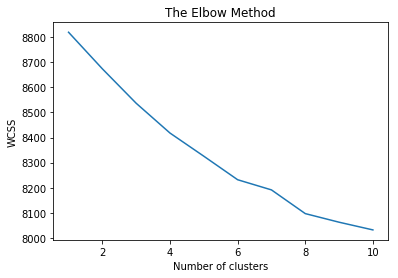

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [41]:
print(words[250:300])

['crane', 'crash', 'crate', 'crawl', 'crawler', 'creosot', 'cross', 'crude', 'crush', 'crusher', 'cut', 'cutter', 'cyanid', 'cycl', 'cylind', 'dam', 'damag', 'day', 'dead', 'death', 'debri', 'decapit', 'deck', 'deep', 'deglov', 'degre', 'degreas', 'dehydr', 'deliveri', 'demolit', 'dermat', 'derrick', 'descend', 'deton', 'develop', 'devic', 'die', 'diesel', 'dioxid', 'dip', 'dirt', 'discharg', 'disconnect', 'diseas', 'disintegr', 'disloc', 'dismantl', 'ditch', 'dive', 'diver']


## Using 6 Clusters based on the elbow

In [42]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : kill, employe, struck, fall, crush, truck, crane, caught, worker, run, explos, vehicl, tree, elev, roll, boom, lift, pipe, collaps, pin, car, trailer, head, bucket, tank
1 : injur, employe, fall, struck, explos, kill, worker, collaps, caught, hand, ladder, truck, machin, explod, scaffold, crane, roof, arm, finger, pin, anoth, die, forklift, leg, chemic
2 : fractur, fall, leg, employe, ladder, sustain, struck, suffer, worker, ankl, arm, hip, foot, truck, rib, roof, caught, wrist, scaffold, hand, multipl, pelvi, skull, machin, forklift
3 : amput, finger, employe, machin, press, caught, thumb, saw, fingertip, worker, tip, hand, crush, conveyor, belt, partial, oper, use, arm, drill, blade, pulley, fan, punch, lacer
4 : burn, employe, hot, flash, explos, ignit, suffer, chemic, arc, sustain, receiv, electr, hand, die, worker, water, tank, oil, explod, vapor, gas, acid, steam, fuel, spray
5 : employe, die, fall, crush, worker, electrocut, suffer, later, struck, injuri, expos, drown, lacer

Trying 7

In [43]:
kmeans = KMeans(n_clusters = 7, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : amput, finger, employe, machin, press, caught, saw, thumb, fingertip, tip, worker, hand, conveyor, belt, crush, partial, oper, use, blade, drill, arm, pulley, fan, power, brake
1 : fall, employe, fractur, kill, injur, ladder, worker, roof, scaffold, leg, sustain, elev, suffer, truck, platform, injuri, crush, hip, ankl, tower, head, open, multipl, lift, tree
2 : employe, kill, crush, caught, electrocut, fractur, worker, truck, suffer, expos, run, hand, machin, pin, arm, leg, hospit, drown, lacer, explos, line, crane, forklift, carbon, roll
3 : die, later, employe, fall, struck, heart, attack, worker, asphyxia, head, truck, crush, collaps, work, injur, exposur, elev, explos, caught, machin, heat, accid, roof, ladder, tank
4 : burn, employe, hot, flash, explos, suffer, ignit, chemic, arc, sustain, receiv, hand, electr, water, worker, tank, oil, explod, vapor, gas, die, acid, steam, asphalt, spray
5 : struck, kill, employe, injur, fall, fractur, crane, leg, tree, fli, object, truck, pi

And then 8

In [44]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : die, later, employe, fall, struck, heart, attack, worker, asphyxia, head, crush, truck, injur, collaps, work, explos, exposur, caught, elev, machin, heat, accid, roof, ladder, tank
1 : amput, finger, employe, machin, press, caught, thumb, saw, fingertip, tip, worker, hand, conveyor, belt, crush, partial, oper, use, drill, blade, pulley, arm, fan, power, punch
2 : struck, kill, employe, injur, fall, crane, tree, fli, object, truck, vehicl, pipe, log, head, worker, load, boom, steel, bucket, drill, beam, metal, equip, forklift, block
3 : fractur, fall, leg, employe, ladder, sustain, struck, suffer, worker, ankl, arm, hip, foot, truck, rib, roof, caught, wrist, scaffold, hand, multipl, pelvi, skull, machin, forklift
4 : injur, employe, fall, explos, kill, caught, collaps, worker, hand, ladder, explod, scaffold, truck, machin, roof, finger, crane, pin, anoth, arm, chemic, trench, accid, lift, flash
5 : employe, crush, electrocut, fall, suffer, worker, expos, injuri, drown, lacer, hospi

0 : die, later, employe, fall, struck, heart, attack, worker, asphyxia, head, crush, truck, injur, collaps, work, explos, exposur, caught, elev, machin, heat, accid, roof, ladder, tank


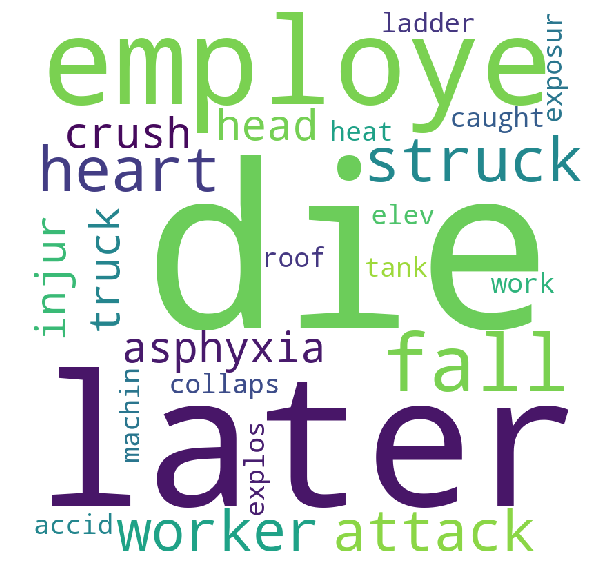

1 : amput, finger, employe, machin, press, caught, thumb, saw, fingertip, tip, worker, hand, conveyor, belt, crush, partial, oper, use, drill, blade, pulley, arm, fan, power, punch


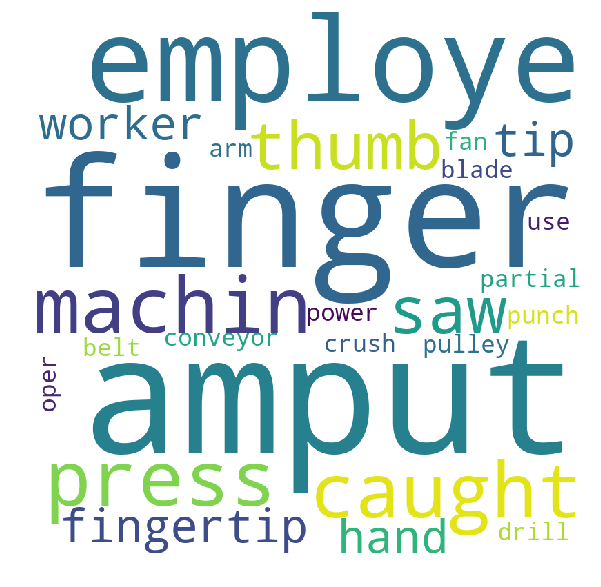

2 : struck, kill, employe, injur, fall, crane, tree, fli, object, truck, vehicl, pipe, log, head, worker, load, boom, steel, bucket, drill, beam, metal, equip, forklift, block


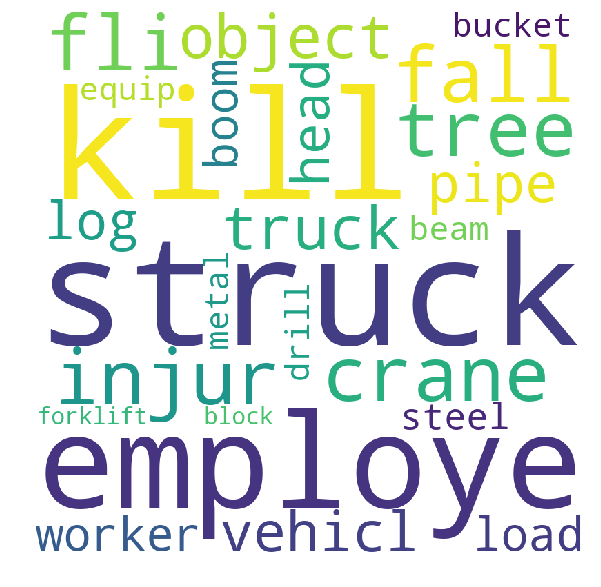

3 : fractur, fall, leg, employe, ladder, sustain, struck, suffer, worker, ankl, arm, hip, foot, truck, rib, roof, caught, wrist, scaffold, hand, multipl, pelvi, skull, machin, forklift


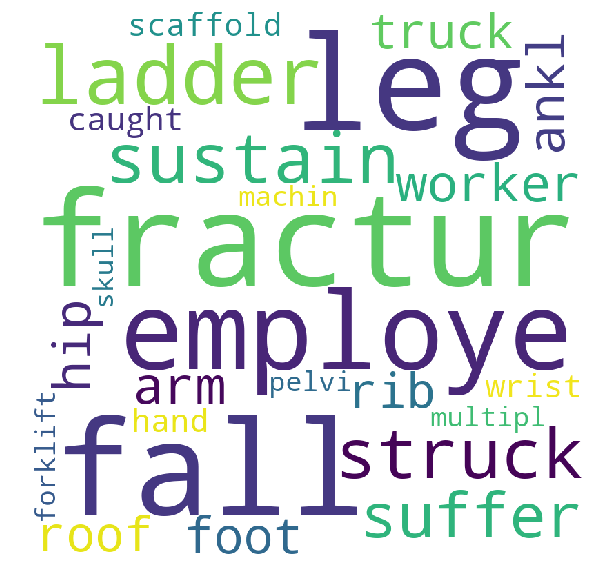

4 : injur, employe, fall, explos, kill, caught, collaps, worker, hand, ladder, explod, scaffold, truck, machin, roof, finger, crane, pin, anoth, arm, chemic, trench, accid, lift, flash


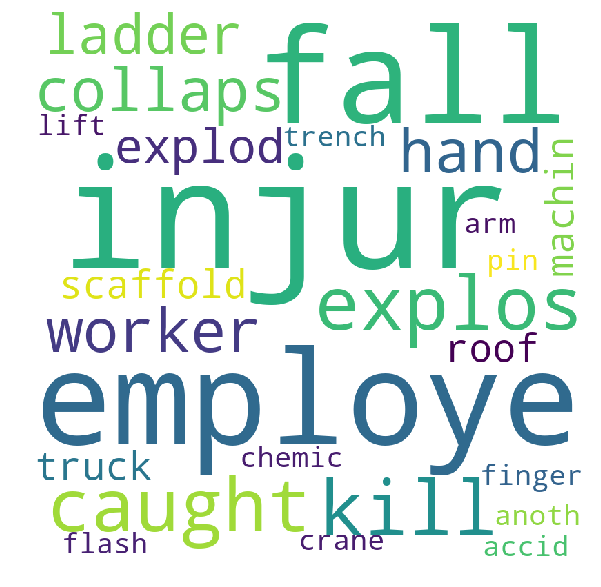

5 : employe, crush, electrocut, fall, suffer, worker, expos, injuri, drown, lacer, hospit, hand, caught, sustain, arm, machin, truck, shock, carbon, line, finger, monoxid, exposur, chemic, power


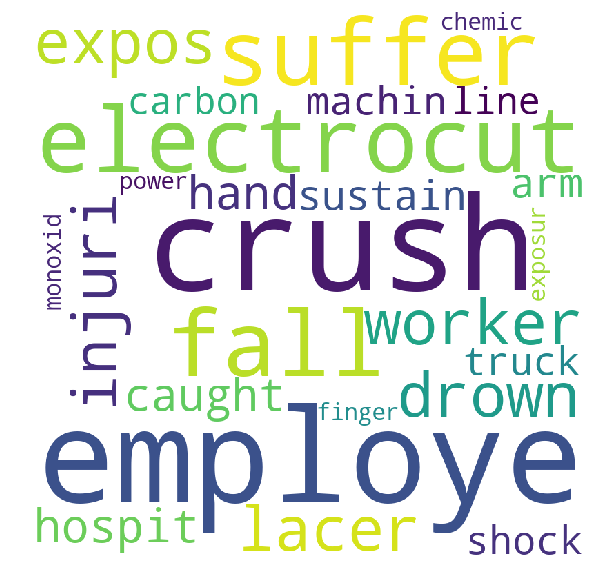

6 : burn, employe, hot, flash, explos, suffer, ignit, chemic, arc, sustain, receiv, hand, electr, water, worker, tank, oil, explod, vapor, gas, die, acid, steam, spray, fuel


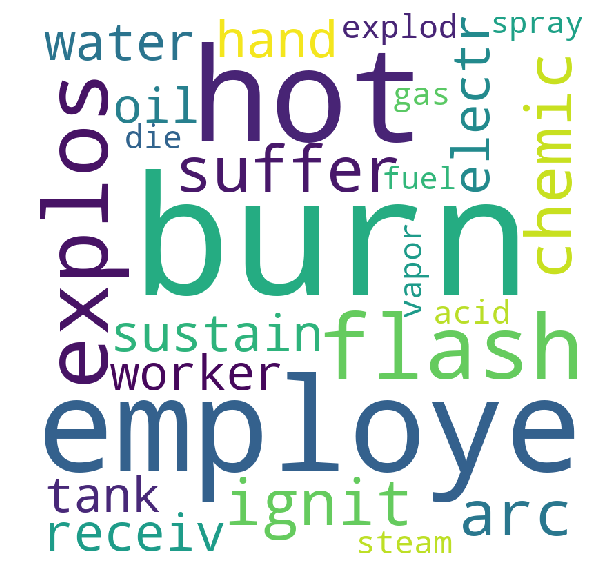

7 : kill, employe, fall, crush, truck, caught, worker, explos, run, elev, crane, lift, roll, collaps, pin, tank, roof, trailer, forklift, machin, vehicl, car, aerial, tower, boom


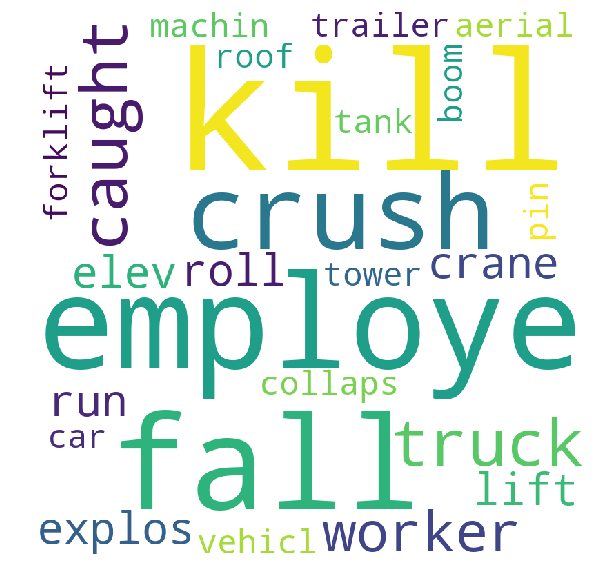

In [45]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                          min_font_size = 10).generate(', '.join(words[word] for word in centroid))
      
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
      
    plt.show() 

## Evaluation
If you don’t have labels for your dataset, then you can still evaluate your clustering model with some metrics. One of them is Silhouette Coefficient. From the sklearn’s documentation:

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a,b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [46]:
from sklearn.metrics import silhouette_score
silhouette_score(X3, labels=kmeans.predict(X3))

0.03544322589029319

# Method 3
* https://sanjayasubedi.com.np/nlp/nlp-with-python-document-clustering/

In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [48]:
from sklearn.datasets import load_files

# for reproducibility
random_state = 0 

df=pd.read_table('osha.txt',header=None,names = ["text", "description"])
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,text,description
201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...
202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...
200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...
200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...
201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...


Feature extraction

In [49]:
vec = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize2, 
                      use_idf=True, max_features = 30)
vec.fit(df.text.values)
features = vec.transform(df.text.values)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Check the most common features

### Find the top ten most common word
* https://stackoverflow.com/questions/34232190/scikit-learn-tfidfvectorizer-how-to-get-top-n-terms-with-highest-tf-idf-score#

In [50]:
feature_array = np.array(vec.get_feature_names())
tfidf_sorting = np.argsort(features.toarray()).flatten()[::-1]

n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['struck', 'killed', 'employee', 'worker', 'fall', 'amputates',
       'arm', 'burn', 'burned', 'caught'], dtype='<U12')

## Model training

In [51]:
cls = MiniBatchKMeans(n_clusters=8, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [52]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([7, 1, 0, ..., 4, 6, 4], dtype=int32)

Visualize

In [0]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

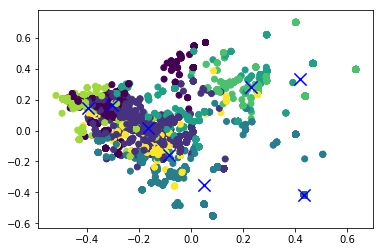

In [54]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

## Evaluation

In [55]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.23751245208024657

## Word cloud

In [0]:
words = vec.get_feature_names()
common_words = cls.cluster_centers_.argsort()[:,-1:-26:-1]


0 : worker, fall, amputates, finger, fracture, dy, killed, truck, suffers, injured, ladder, machine, burned, struck, falling, sustains, hand, electrocuted, burn, employee, crushed, leg, caught, arm, explosion


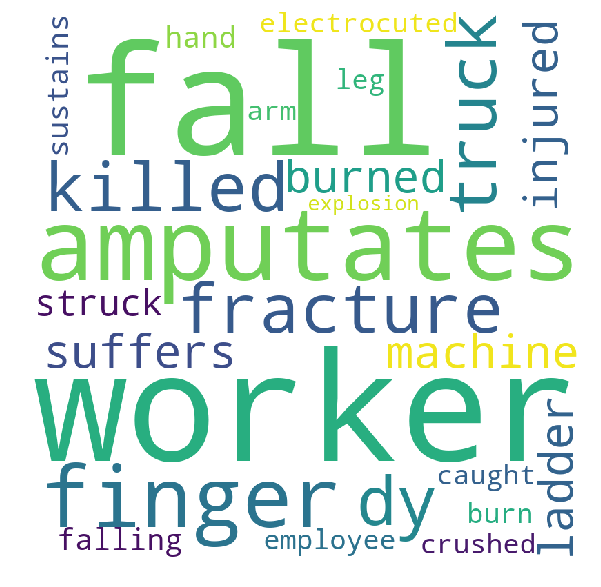

1 : employee, fall, fracture, shock, electric, burn, suffers, leg, electrocuted, arm, ladder, caught, hand, employee's, crushed, machine, sustains, dy, later, truck, finger, amputates, falling, explosion, struck


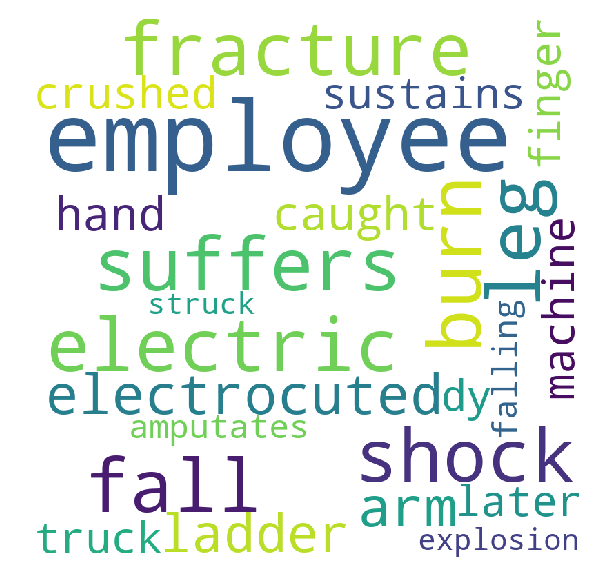

2 : employee, worker, truck, amputates, arm, burn, burned, caught, crushed, dy, electric, electrocuted, employee's, explosion, fall, falling, finger, fracture, hand, injured, killed, ladder, later, leg, machine


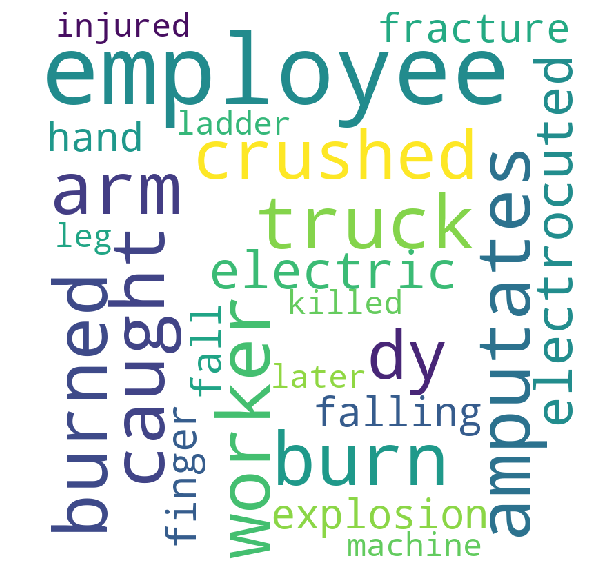

3 : injured, employee, fall, struck, explosion, killed, ladder, caught, falling, truck, later, dy, arm, machine, employee's, hand, electrocuted, shock, crushed, worker, finger, amputated, electric, fracture, leg


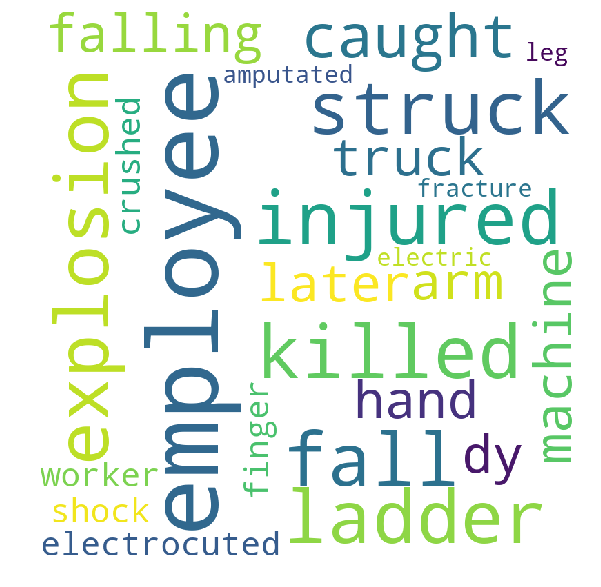

4 : struck, killed, employee, falling, dy, fracture, employee's, later, truck, finger, leg, suffers, amputates, injured, machine, hand, explosion, crushed, worker, fall, electrocuted, electric, ladder, shock, caught


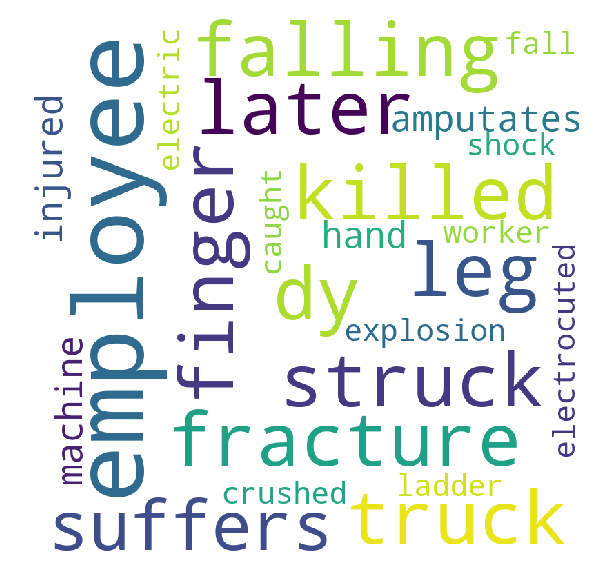

5 : killed, employee, fall, crushed, caught, truck, falling, explosion, machine, ladder, electrocuted, worker, hand, fracture, amputates, arm, burn, burned, sustains, suffers, dy, electric, struck, shock, employee's


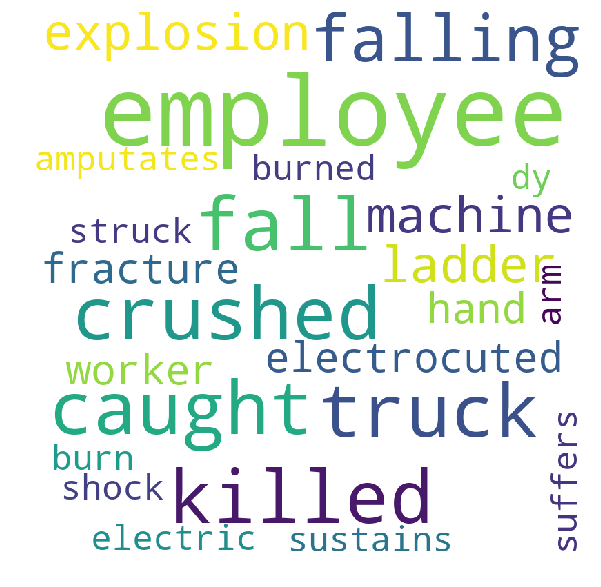

6 : finger, employee's, amputated, machine, caught, employee, crushed, amputates, injured, arm, hand, falling, later, fracture, fall, struck, killed, shock, sustains, suffers, burn, burned, electric, dy, electrocuted


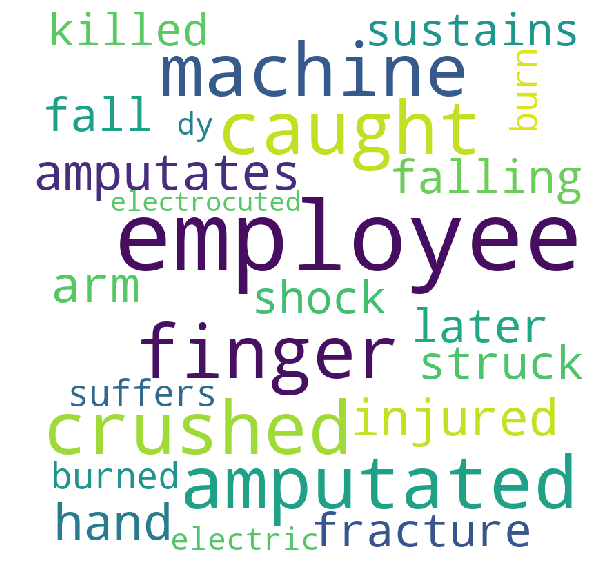

7 : burned, dy, employee, explosion, fall, employee's, later, truck, worker, burn, falling, injured, suffers, machine, crushed, electric, arm, leg, hand, amputates, sustains, caught, electrocuted, struck, shock


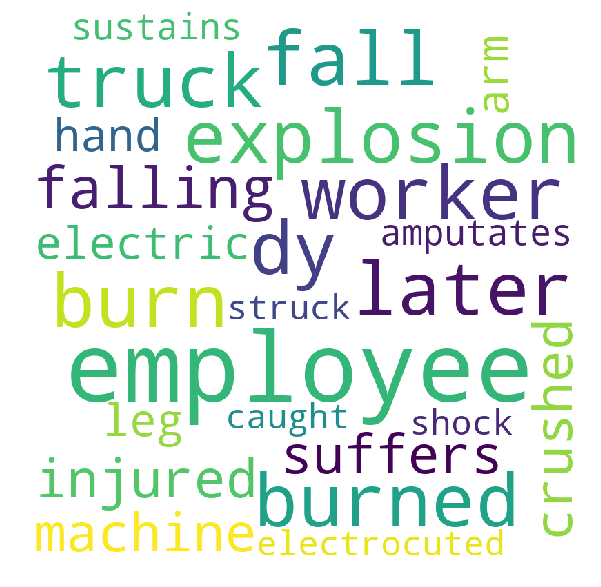

In [57]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                          min_font_size = 10).generate(', '.join(words[word] for word in centroid))
      
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
      
    plt.show() 

# Method 4 Topic Modelling
* https://sanjayasubedi.com.np/nlp/nlp-with-python-topic-modeling/

In [0]:
from sklearn.datasets import load_files
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [59]:
df=pd.read_table('osha.txt',header=None,names = ["text", "description"])
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,text,description
201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...
202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...
200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...
200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...
201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...


## Model training

In [60]:
# number of topics to extract
n_topics = 10

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=100, stop_words="english", max_df=0.95, min_df=2, tokenizer = tokenize)
features = vec.fit_transform(df.text)

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

## Results

0 kill employe crush truck explos caught run crane collaps lift vehicl pin roll car tank 


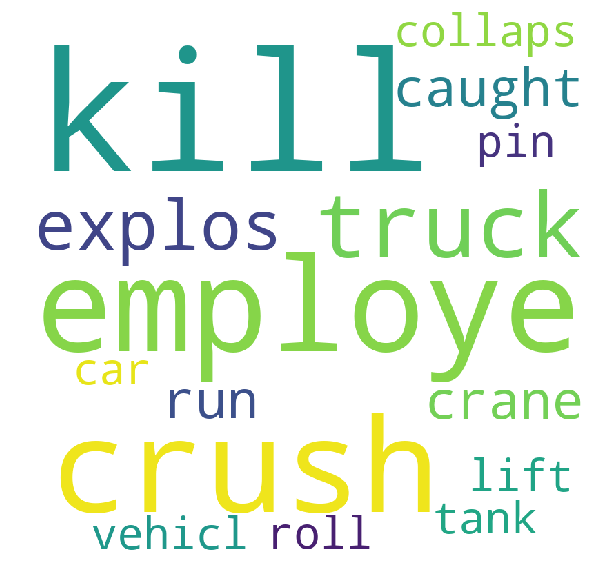

1 injur employe explos collaps hand caught explod pin arm machin chemic dure truck expos accid 


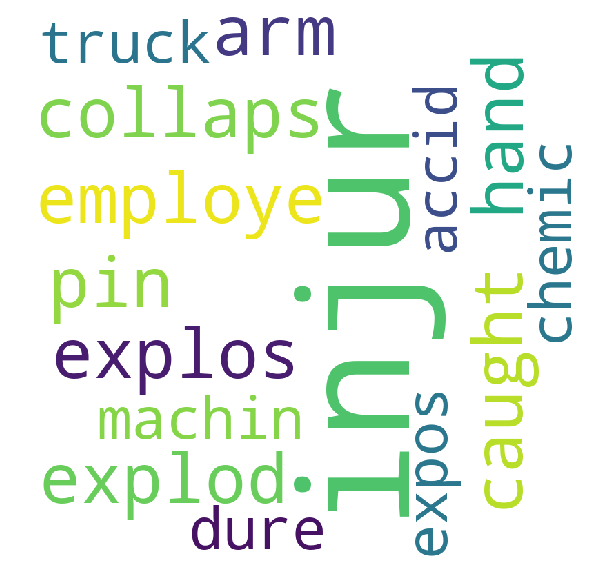

2 shock electr receiv suffer arc electrocut contact line sustain ladder power flash expos work employe 


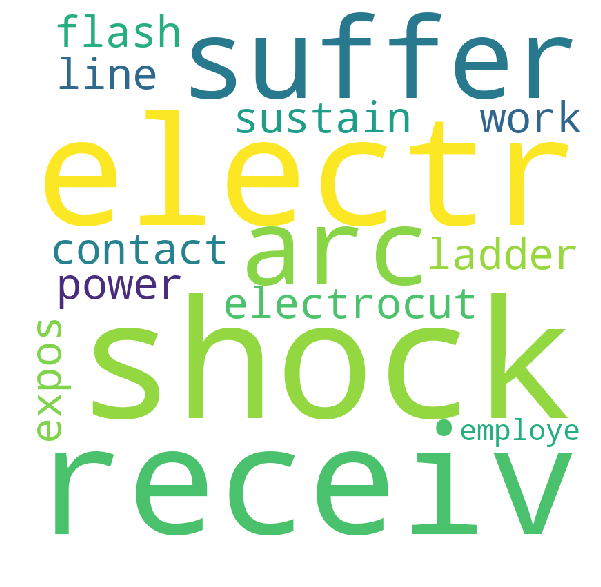

3 amput finger employe machin caught press saw crush hand thumb tip conveyor oper use arm 


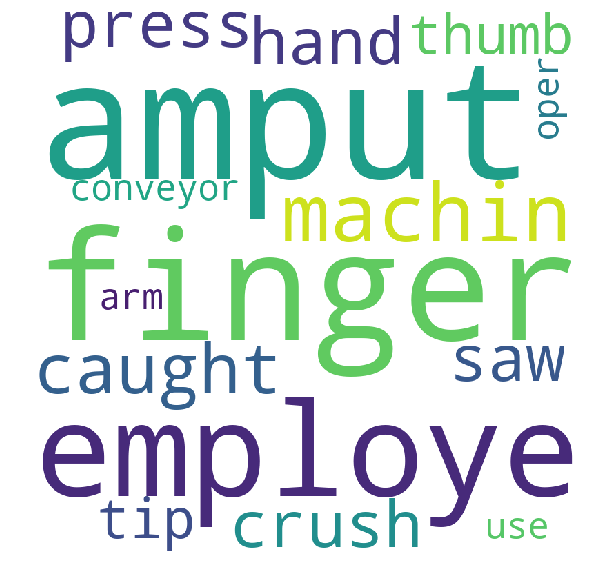

4 die employe later attack heart crush work collaps head exposur electrocut heat expos asphyxi truck 


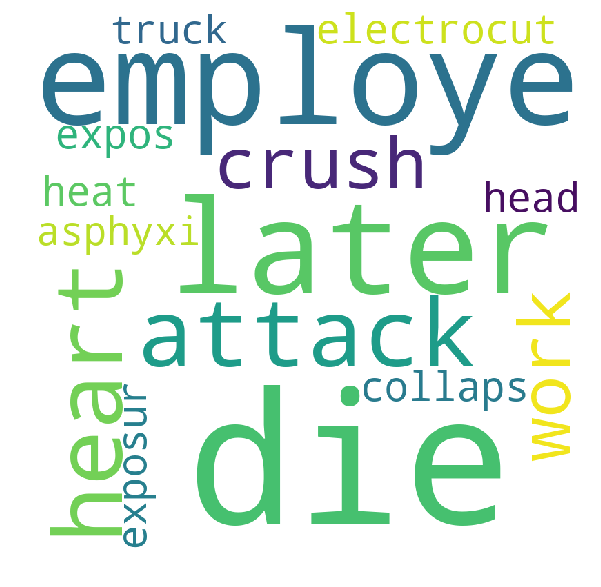

5 fall ladder roof scaffold elev tree floor injuri drown head load steel shaft later concret 


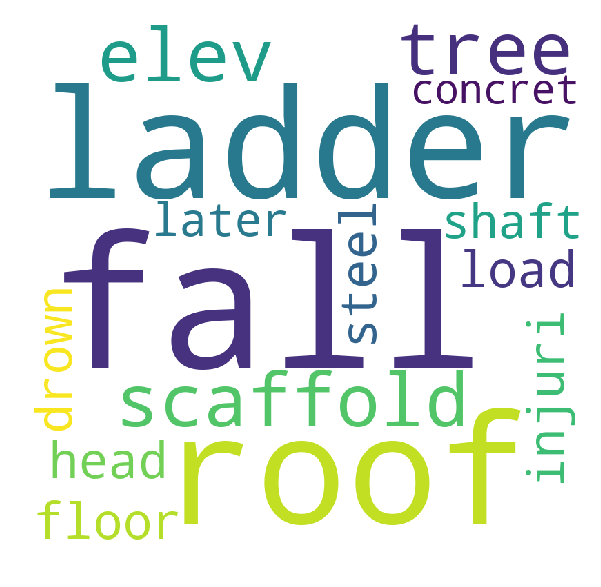

6 burn employe hot explos suffer flash ignit chemic arc hand receiv sustain water explod gas 


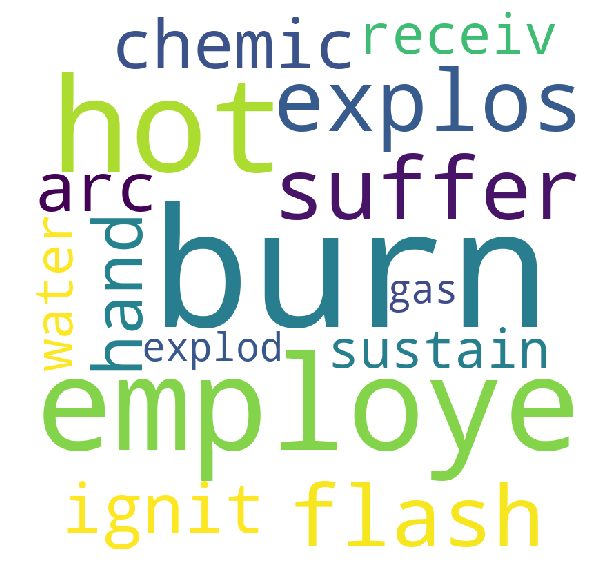

7 struck tree vehicl crane head pipe log load steel metal bucket later boom employe truck 


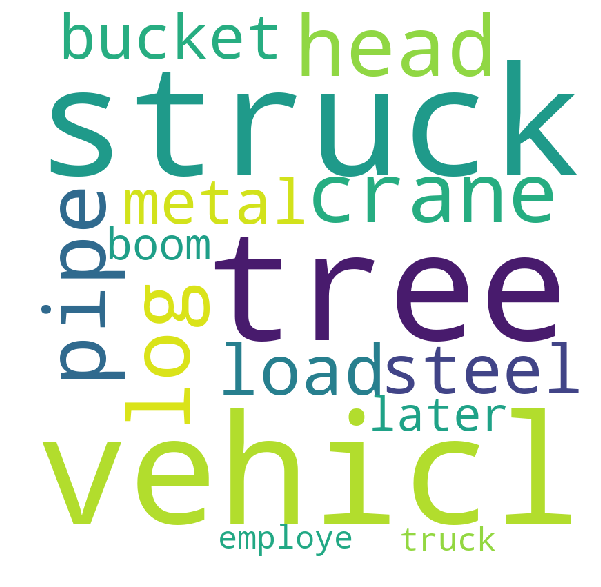

8 worker sustain electrocut truck machin heat line strike collaps crush kill lacer roof power lift 


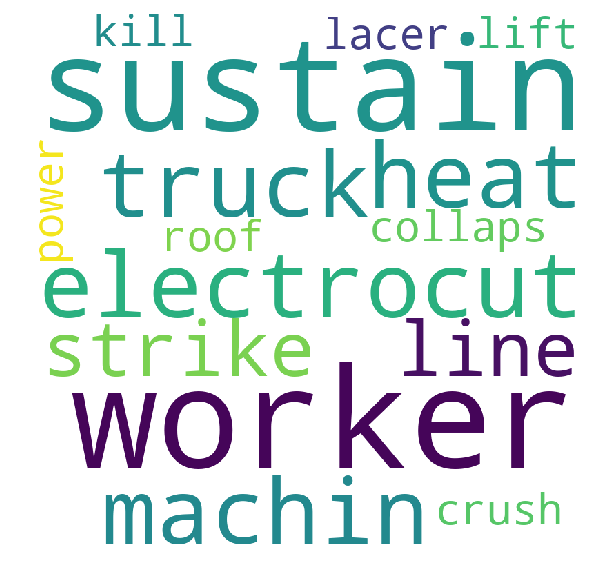

9 fractur employe leg suffer sustain arm ankl caught foot ladder truck hand pin forklift injuri 


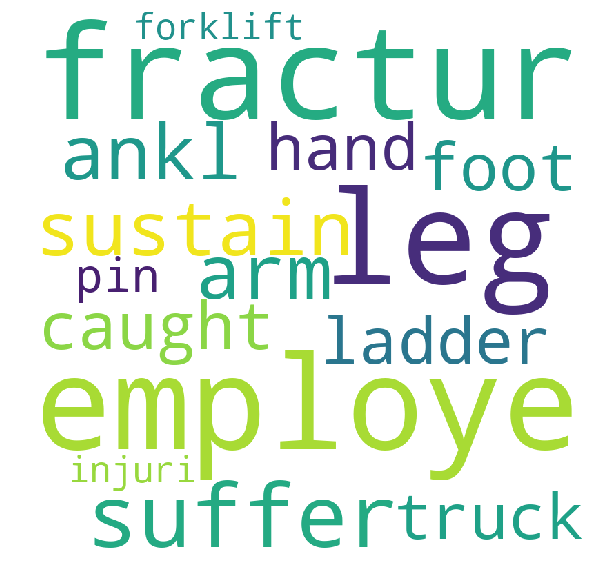

In [61]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 15


for i, topic_vec in enumerate(cls.components_):
    sent = []
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
        sent.append(feature_names[fid])
    print()

    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      min_font_size = 10).generate(', '.join(sent))

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
      
    plt.show() 

## Word Cloud

In [62]:
for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
    print (feature_names[fid])



fractur
employe
leg
suffer
sustain
arm
ankl
caught
foot
ladder
truck
hand
pin
forklift
injuri


## Testing on a new sentence

In [63]:
new_articles = [
    "Playstation network was down so many people were angry",
    "Germany scored 7 goals against Brazil in worldcup semi-finals"
]
# first transform the text into features using vec
# then pass it to transform of cls
# the result will be a matrix of shape [2, 10]
# then we sort the topic id based on the score using argsort
# and take the last one (with the highest score) for each row using `[:,-1]` indexing
cls.transform(vec.transform(new_articles)).argsort(axis=1)[:,-1]

array([9, 9])

# POS Tagging for job title
* https://www.analyticsvidhya.com/blog/2019/02/stanfordnlp-nlp-library-python/
* https://towardsdatascience.com/job-title-analysis-in-python-and-nltk-8c7ba4fe4ec6
* https://www.kaggle.com/estasney/job-title-synonyms
* https://datascience.stackexchange.com/questions/60649/how-to-identify-occupations-in-the-osha-data-file

In [64]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [65]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

sent = '''Farm Worker Falls In A Depresion In A Field  Fractures Leg'''

# The input for POS tagger needs to be tokenized first.
sent_pos = pos_tag(word_tokenize(sent))
sent_pos

[('Farm', 'NN'),
 ('Worker', 'NNP'),
 ('Falls', 'NNP'),
 ('In', 'IN'),
 ('A', 'NNP'),
 ('Depresion', 'NNP'),
 ('In', 'IN'),
 ('A', 'NNP'),
 ('Field', 'NNP'),
 ('Fractures', 'NNP'),
 ('Leg', 'NNP')]

In [66]:
sent_chunk = ne_chunk(sent_pos)
print(sent_chunk)

(S
  (PERSON Farm/NN)
  (PERSON Worker/NNP Falls/NNP)
  In/IN
  A/NNP
  Depresion/NNP
  In/IN
  A/NNP
  Field/NNP
  (PERSON Fractures/NNP Leg/NNP))


In [67]:
grammar2 = r"""
  NE: {<NNP>+(<CC>)?(<IN>)?<NNP>+}      # chunk NE sequences of proper nouns
  NP: {<DT>(<JJ>)?<NN>}   # chunk noun phrase by DT+NN  
"""


cp2 = nltk.RegexpParser(grammar2)
print(cp2.parse(sent_pos))


(S
  Farm/NN
  (NE Worker/NNP Falls/NNP In/IN A/NNP Depresion/NNP)
  In/IN
  (NE A/NNP Field/NNP Fractures/NNP Leg/NNP))


In [68]:
#dictionary that contains pos tags and their explanations
pos_dict = {
'CC': 'coordinating conjunction','CD': 'cardinal digit','DT': 'determiner',
'EX': 'existential there (like: \"there is\" ... think of it like \"there exists\")',
'FW': 'foreign word','IN':  'preposition/subordinating conjunction','JJ': 'adjective \'big\'',
'JJR': 'adjective, comparative \'bigger\'','JJS': 'adjective, superlative \'biggest\'',
'LS': 'list marker 1)','MD': 'modal could, will','NN': 'noun, singular \'desk\'',
'NNS': 'noun plural \'desks\'','NNP': 'proper noun, singular \'Harrison\'',
'NNPS': 'proper noun, plural \'Americans\'','PDT': 'predeterminer \'all the kids\'',
'POS': 'possessive ending parent\'s','PRP': 'personal pronoun I, he, she',
'PRP$': 'possessive pronoun my, his, hers','RB': 'adverb very, silently,',
'RBR': 'adverb, comparative better','RBS': 'adverb, superlative best',
'RP': 'particle give up','TO': 'to go \'to\' the store.','UH': 'interjection errrrrrrrm',
'VB': 'verb, base form take','VBD': 'verb, past tense took',
'VBG': 'verb, gerund/present participle taking','VBN': 'verb, past participle taken',
'VBP': 'verb, sing. present, non-3d take','VBZ': 'verb, 3rd person sing. present takes',
'WDT': 'wh-determiner which','WP': 'wh-pronoun who, what','WP$': 'possessive wh-pronoun whose',
'WRB': 'wh-abverb where, when','QF' : 'quantifier, bahut, thoda, kam (Hindi)','VM' : 'main verb',
'PSP' : 'postposition, common in indian langs','DEM' : 'demonstrative, common in indian langs'
}

#extract parts of speech
def extract_pos(doc):
    parsed_text = {'word':[], 'pos':[], 'exp':[]}
    for sent in doc.sentences:
        for wrd in sent.words:
            if wrd.pos in pos_dict.keys():
                pos_exp = pos_dict[wrd.pos]
            else:
                pos_exp = 'NA'
            parsed_text['word'].append(wrd.text)
            parsed_text['pos'].append(wrd.pos)
            parsed_text['exp'].append(pos_exp)
    #return a dataframe of pos and text
    return pd.DataFrame(parsed_text)

#extract pos
extract_pos(doc)

NameError: ignored

In [0]:
doc.sentences[0].print_dependencies()
